<a href="https://colab.research.google.com/github/rgabhane94/Yulu.py/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem Statement: To analyze and determine whether purchase behavior (amount spent) significantly differs across Gender, Marital Status, and Age segments during Black Friday.

In [ ]:
!jupyter nbconvert --execute --to html "/content/Yulu_Hypothesis_Testing.ipynb"

[NbConvertApp] Converting notebook /content/Yulu_Hypothesis_Testing.ipynb to html
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] WARNING | Alternative text is missing on 31 image(s).
[NbConvertApp] Writing 1977121 bytes to /content/Yulu_Hypothesis_Testing.html


####Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

####Import file

In [ ]:
df = pd.read_csv("bike_sharing.csv")

####Exploratory Data Analysis

In [ ]:
# Examine dataset structure, characteristics, and statistical summary.
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
#B. Identify missing values and perform Imputation using an appropriate method.
print("Checking Missing Values:\n")
print(df.isnull().sum())

# Another way (same result)
print("\nChecking Missing Values using .isna():\n")
print(df.isna().sum())

Checking Missing Values:

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Checking Missing Values using .isna():

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
# C. Identify and remove duplicate records.

df.duplicated().sum()

np.int64(0)

Numerical Columns: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
Categorical Columns: ['datetime']

===== Numerical Variable Distribution =====



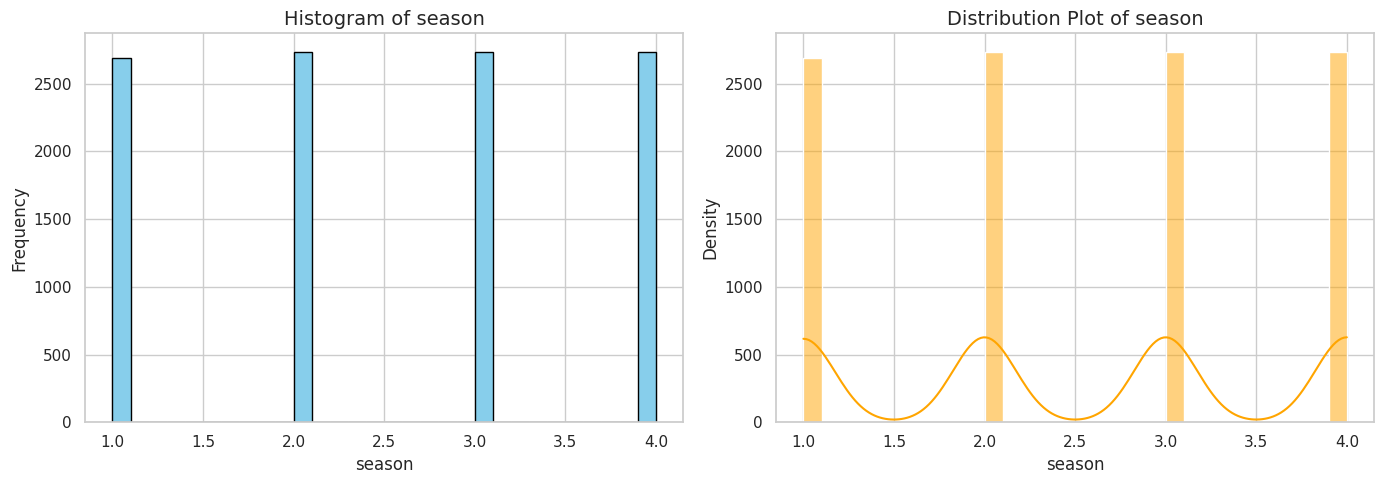

season Summary Statistics:
count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

------------------------------------



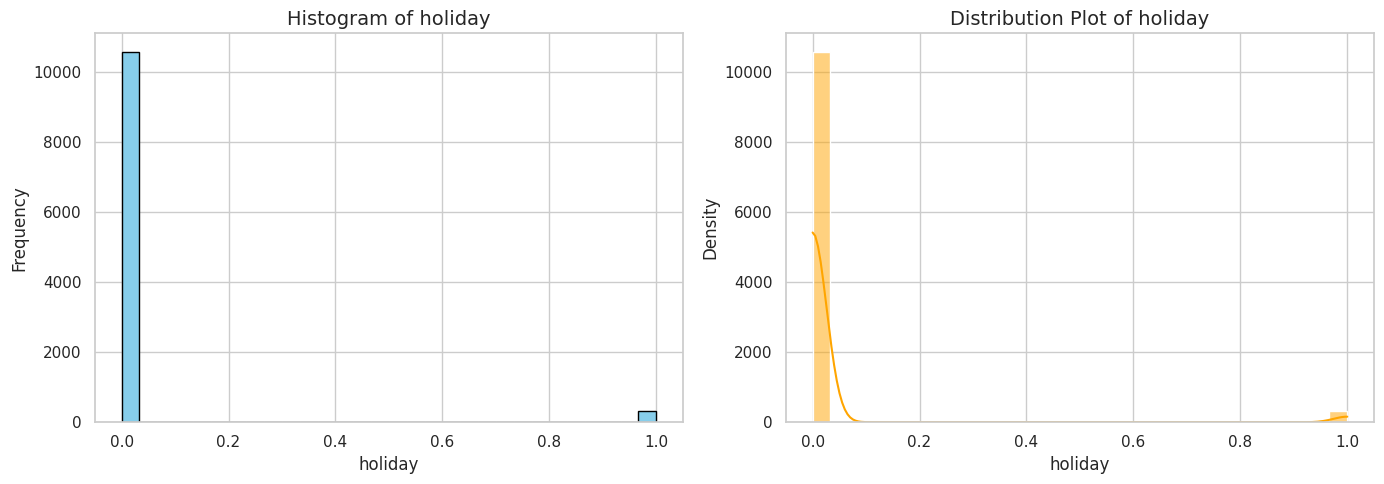

holiday Summary Statistics:
count    10886.000000
mean         0.028569
std          0.166599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64

------------------------------------



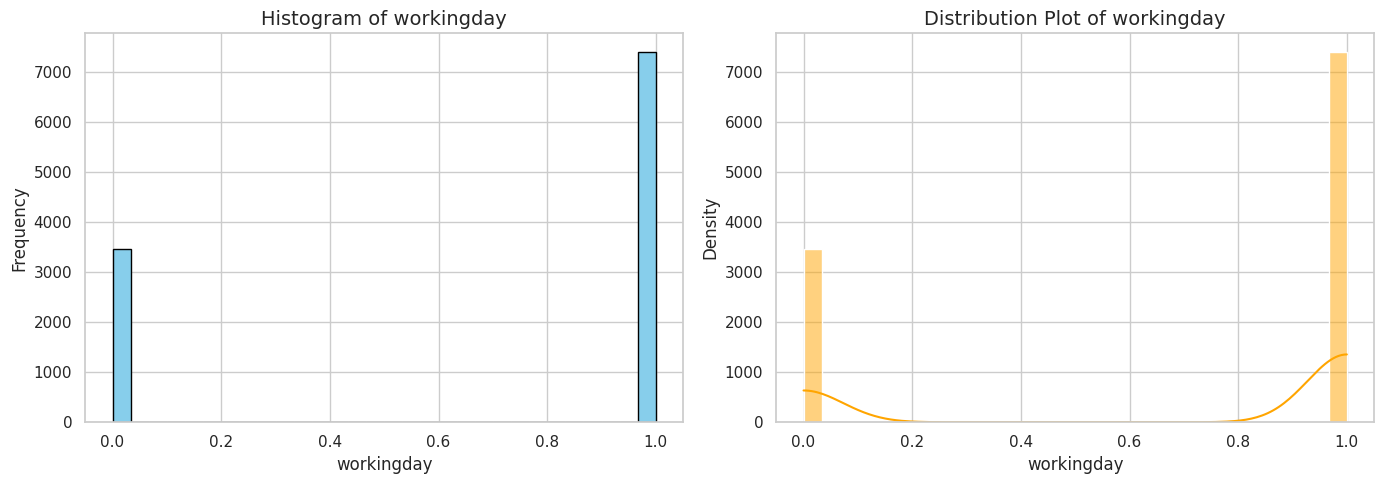

workingday Summary Statistics:
count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64

------------------------------------



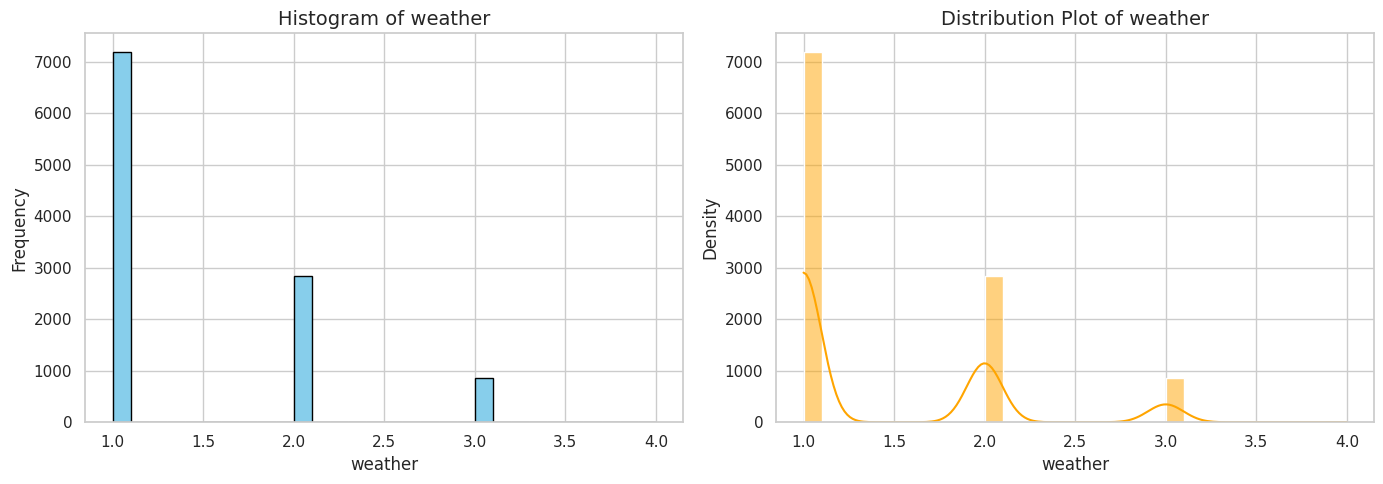

weather Summary Statistics:
count    10886.000000
mean         1.418427
std          0.633839
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weather, dtype: float64

------------------------------------



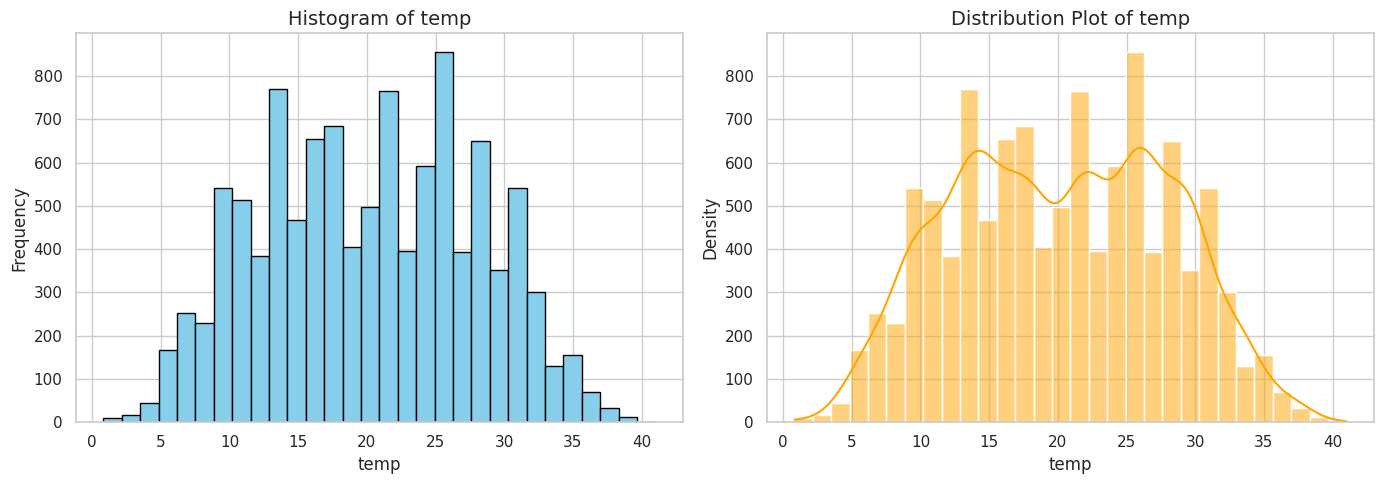

temp Summary Statistics:
count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

------------------------------------



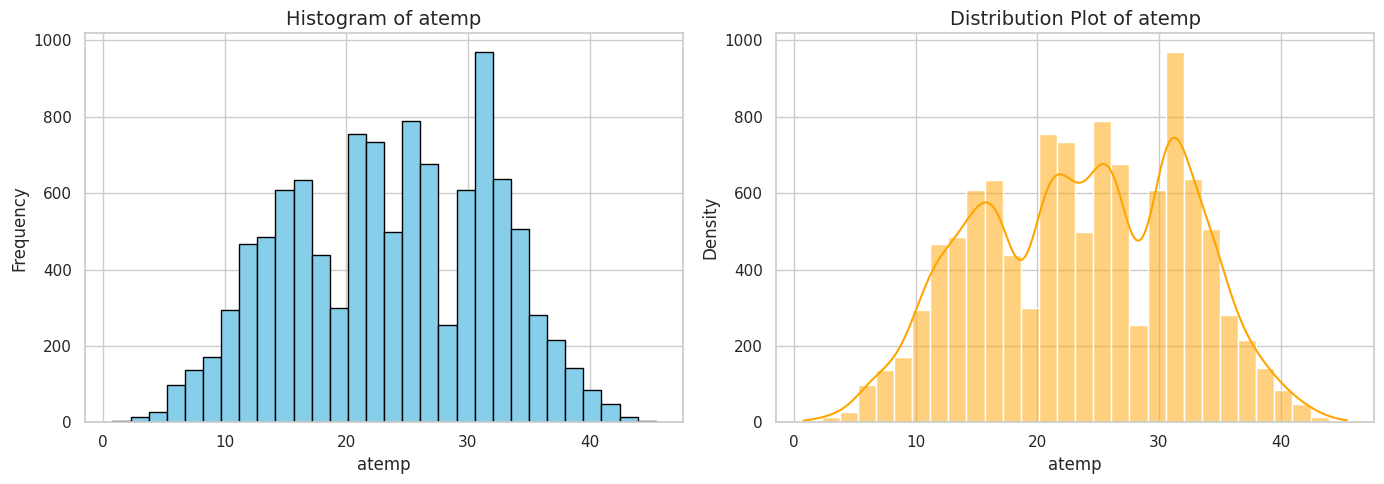

atemp Summary Statistics:
count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

------------------------------------



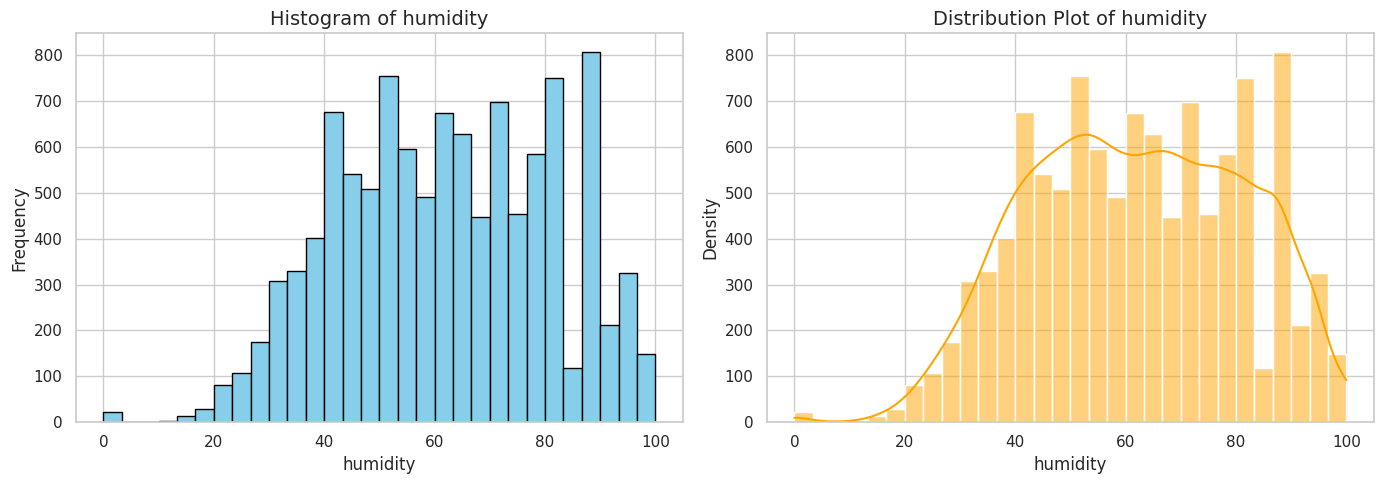

humidity Summary Statistics:
count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

------------------------------------



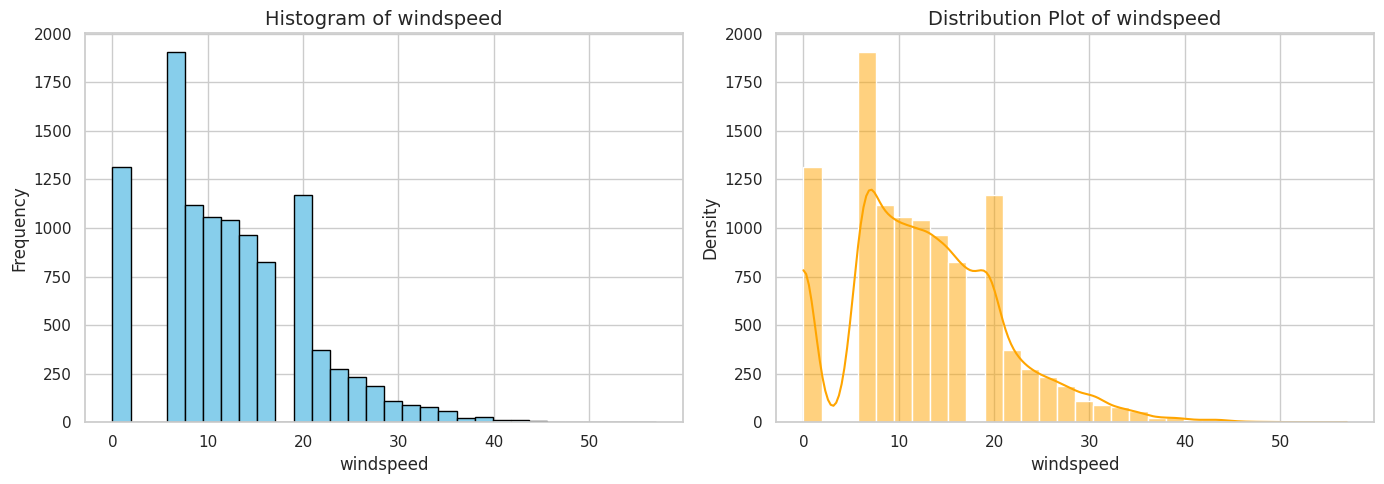

windspeed Summary Statistics:
count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

------------------------------------



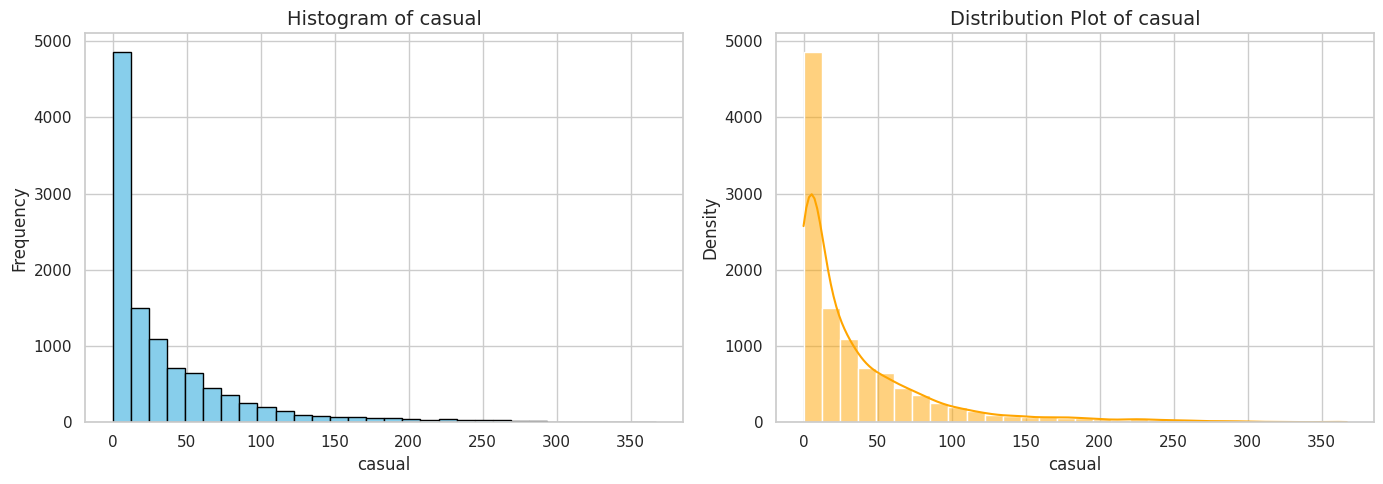

casual Summary Statistics:
count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

------------------------------------



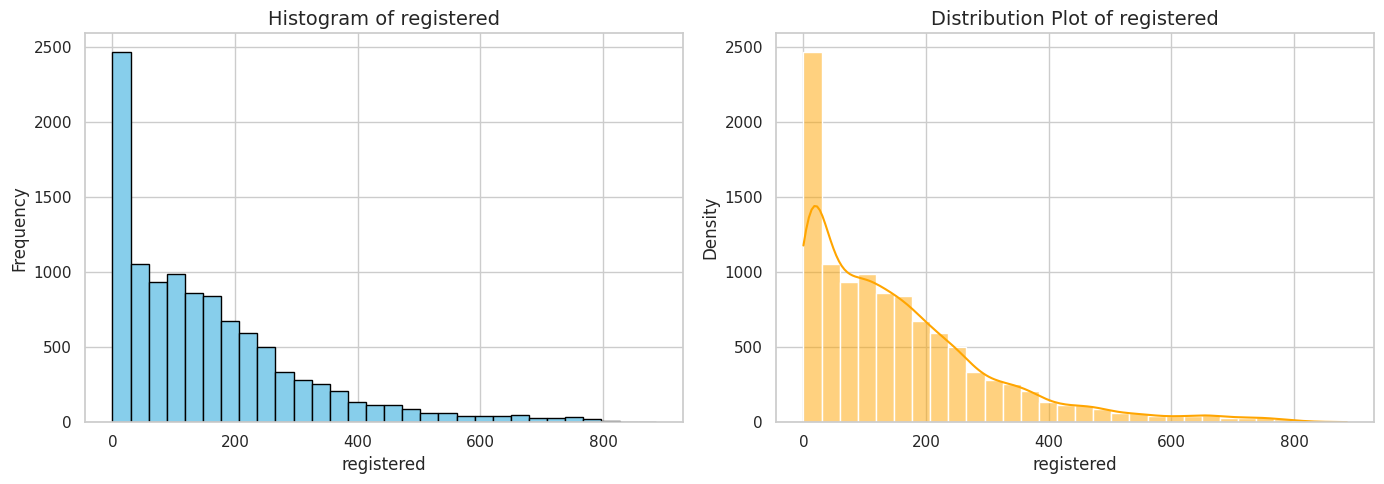

registered Summary Statistics:
count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

------------------------------------



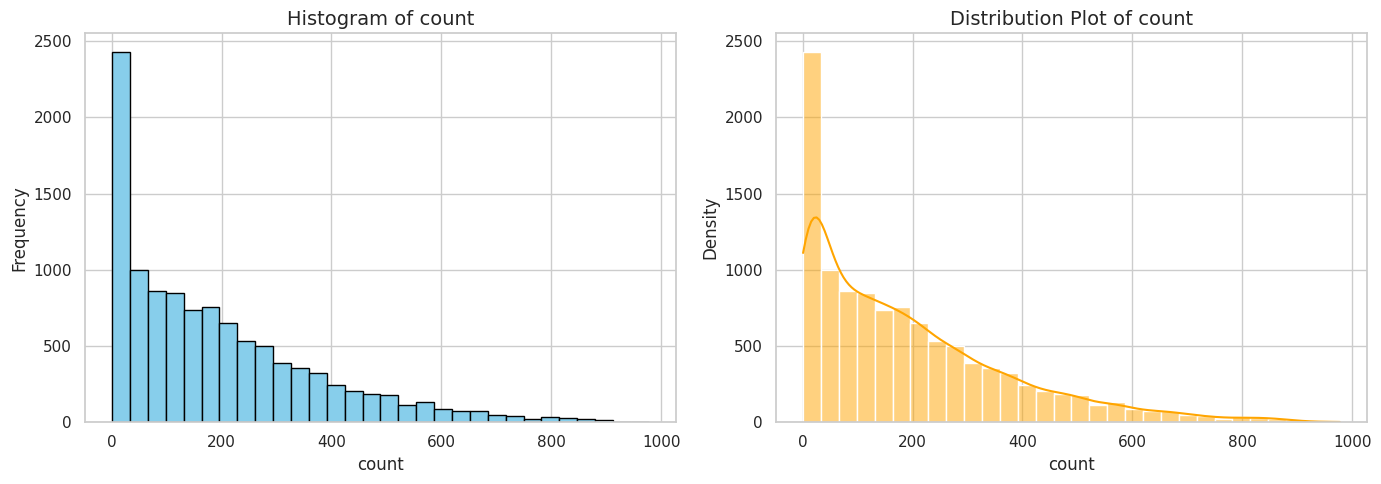

count Summary Statistics:
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

------------------------------------



In [ ]:
# D. Analyze the distribution of Numerical & Categorical variables, separately

# Optional: set style for better visuals
sns.set(style='whitegrid', palette='Set2')

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))

print("\n===== Numerical Variable Distribution =====\n")

for col in num_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Distribution plot (with KDE)
    plt.subplot(1, 2, 2)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='orange')
    plt.title(f'Distribution Plot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    # Optional: Print summary stats
    print(f"{col} Summary Statistics:")
    print(df[col].describe())
    print("\n------------------------------------\n")



Numeric Columns:
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


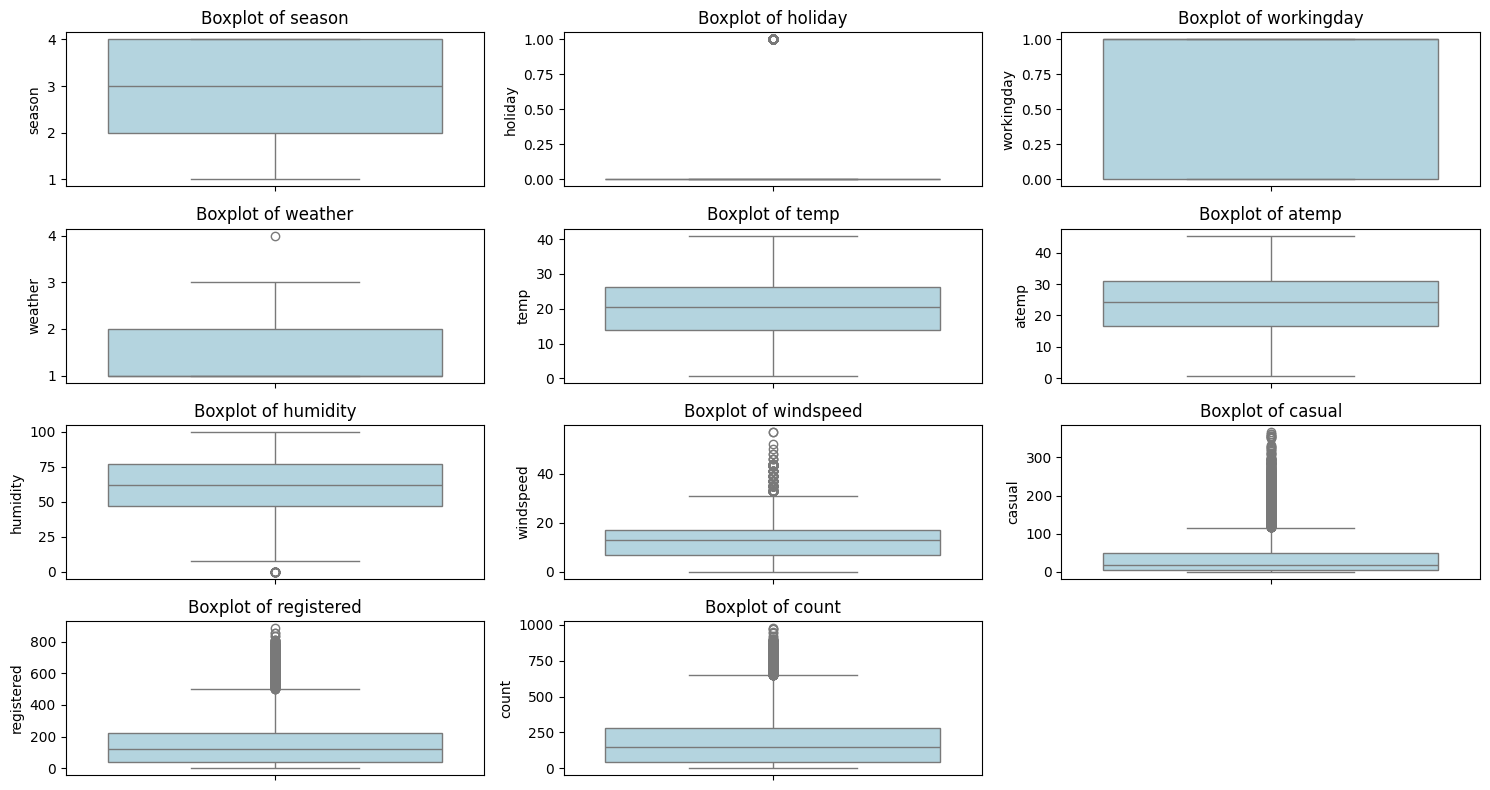

season: 0 outliers detected | Lower bound: -1.00, Upper bound: 7.00
holiday: 311 outliers detected | Lower bound: 0.00, Upper bound: 0.00
workingday: 0 outliers detected | Lower bound: -1.50, Upper bound: 2.50
weather: 1 outliers detected | Lower bound: -0.50, Upper bound: 3.50
temp: 0 outliers detected | Lower bound: -4.51, Upper bound: 44.69
atemp: 0 outliers detected | Lower bound: -4.93, Upper bound: 52.65
humidity: 22 outliers detected | Lower bound: 2.00, Upper bound: 122.00
windspeed: 227 outliers detected | Lower bound: -7.99, Upper bound: 31.99
casual: 749 outliers detected | Lower bound: -63.50, Upper bound: 116.50
registered: 423 outliers detected | Lower bound: -243.00, Upper bound: 501.00
count: 300 outliers detected | Lower bound: -321.00, Upper bound: 647.00
Shape before removing outliers: (10886, 12)
Shape after removing outliers: (9089, 12)


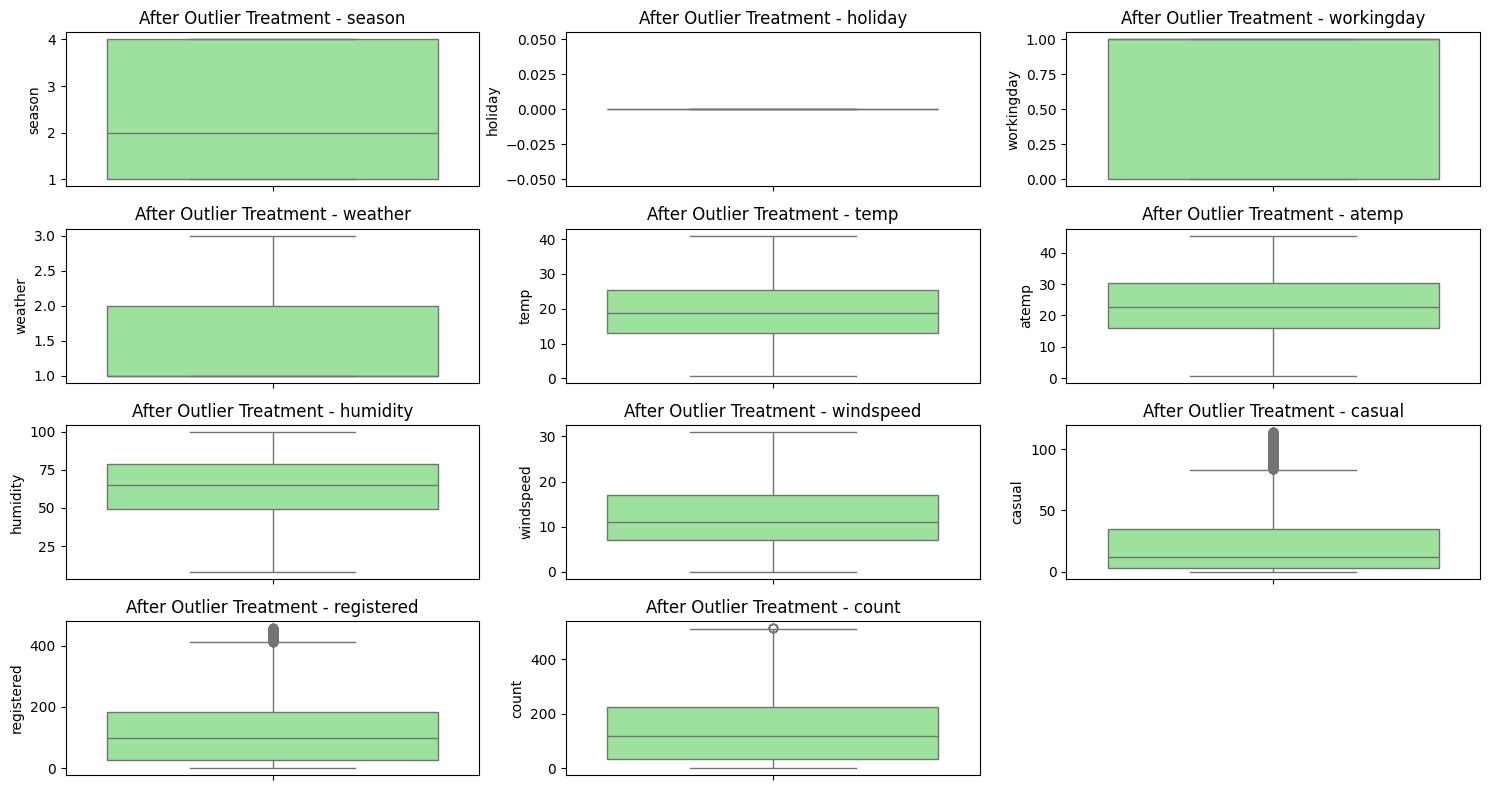

In [ ]:
#e. Check for Outliers and deal with them accordingly.

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:\n", numeric_cols)

# Visualize Outliers using Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Detect Outliers using IQR Method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outlier count for each numeric column
for col in numeric_cols:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers detected | Lower bound: {lb:.2f}, Upper bound: {ub:.2f}")

# Option 1: Remove outliers
df_cleaned = df.copy()
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")

# Verify post-treatment boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(data=df_cleaned, y=col, color='lightgreen') # <-- Use the CORRECT variable: df_cleaned
    plt.title(f'After Outlier Treatment - {col}')
# ...
plt.tight_layout()
plt.show()


####Relationship between the Dependent and Independent Variables

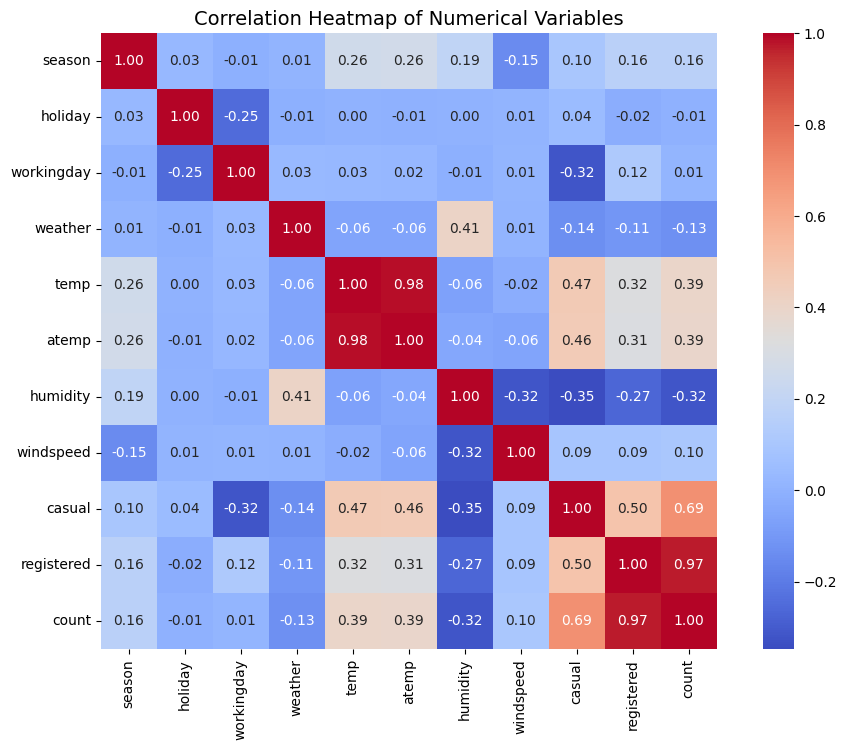


Highly Correlated Feature Pairs (|corr| > 0.8):
     Feature_1 Feature_2  Correlation
34        temp     atemp     0.984948
54  registered     count     0.970948

Removed 2 highly correlated columns: ['atemp', 'count']
Final dataset shape after removal: (10886, 10)


In [ ]:
# Objective:
#   - Examine correlations between numerical features.
#   - Identify strong positive/negative relationships.
#   - Remove multicollinearity if two independent variables are highly correlated.

# Display correlation matrix for numerical variables only
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()

# --- Insights Section ---
# Observe which variables are highly correlated (e.g., |corr| > 0.8).
# High correlation between independent variables may cause multicollinearity.

# Identify highly correlated pairs
threshold = 0.8  # correlation threshold
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > threshold]

print("\nHighly Correlated Feature Pairs (|corr| > 0.8):")
if not high_corr_pairs.empty:
    print(high_corr_pairs)
else:
    print("No highly correlated feature pairs found.")

# Optional: Remove one variable from each highly correlated pair
# (You can adjust based on your business understanding)
to_remove = set(high_corr_pairs['Feature_2'])
df_reduced = df.drop(columns=to_remove, errors='ignore')

print(f"\nRemoved {len(to_remove)} highly correlated columns: {list(to_remove)}")
print(f"Final dataset shape after removal: {df_reduced.shape}")


#### To identify significant difference between the no. of bike rides on Weekdays and Weekends

#####Null Hypothesis (H0): There is no significant difference in the mean number of bike rides between weekdays and weekends.
#####Alternative Hypothesis (Ha): There is a significant difference in the mean number of bike rides between weekdays and weekends.

In [ ]:
# Convert datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract day of week (Monday=0, Sunday=6)
df['day_of_week'] = df['datetime'].dt.dayofweek

# Create a new column 'day_type'
df['day_type'] = np.where(df['day_of_week'] < 5, 'Weekday', 'Weekend')

# Verify the classification
print(df['day_type'].value_counts())

# d. Select appropriate test — 2-Sample Independent T-Test
alpha = 0.05

# Separate data
weekday_rides = df[df['day_type'] == 'Weekday']['count']
weekend_rides = df[df['day_type'] == 'Weekend']['count']

# Check normality assumption
print("Normality Test (Shapiro):")
print("Weekday p-value:", stats.shapiro(weekday_rides.sample(500, random_state=1))[1])
print("Weekend p-value:", stats.shapiro(weekend_rides.sample(500, random_state=1))[1])

# Check variance equality (Levene’s test)
levene_stat, levene_p = stats.levene(weekday_rides, weekend_rides)
print("\nLevene’s test p-value (equal variances check):", levene_p)

# Perform Independent 2-Sample T-Test
t_stat, p_val = stats.ttest_ind(weekday_rides, weekend_rides, equal_var=(levene_p > 0.05))

# e. Decision Based on p-value

print("\nT-Test Results:")
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

if p_val <= alpha:
    print("Reject the Null Hypothesis (H0)")
    print("There is a significant difference in the mean number of bike rides between weekdays and weekends.")
else:
    print("Fail to Reject the Null Hypothesis (Ha)")
    print("There is no significant difference in the mean number of bike rides between weekdays and weekends.")

# f. Inference & Recommendation
weekday_mean = weekday_rides.mean()
weekend_mean = weekend_rides.mean()

print("\nAverage number of rides:")
print(f"Weekdays: {weekday_mean:.2f}")
print(f"Weekends: {weekend_mean:.2f}")

if p_val <= alpha:
    if weekend_mean > weekday_mean:
        print("Inference: Bike rides are significantly higher on weekends.")
        print("Recommendation: Increase availability of bikes and maintenance staff on weekends.")
    else:
        print("Inference: Bike rides are significantly higher on weekdays.")
        print("Recommendation: Optimize bike maintenance and redistribution during weekdays.")
else:
    print("Inference: No significant difference in rides between weekdays and weekends.")
    print("Recommendation: Maintain similar operational capacity throughout the week.")


day_type
Weekday    7723
Weekend    3163
Name: count, dtype: int64
Normality Test (Shapiro):
Weekday p-value: 4.6299365661596814e-20
Weekend p-value: 1.2454439442688286e-19

Levene’s test p-value (equal variances check): 0.955218859658268

T-Test Results:
T-Statistic: 1.0354386367292092
P-Value: 0.3004871142922829
Fail to Reject the Null Hypothesis (Ha)
There is no significant difference in the mean number of bike rides between weekdays and weekends.

Average number of rides:
Weekdays: 192.72
Weekends: 188.77
Inference: No significant difference in rides between weekdays and weekends.
Recommendation: Maintain similar operational capacity throughout the week.


####Correlation of bikes on rent with weather conditions

#####Null Hypothesis (H0): The mean bicycle demand is the same across all weather conditions
#####Alternative Hypothesis (Ha): The mean bicycle demand is not the same for all weather conditions.


Weather Categories: [1 2 3 4]

===== Normality Check =====


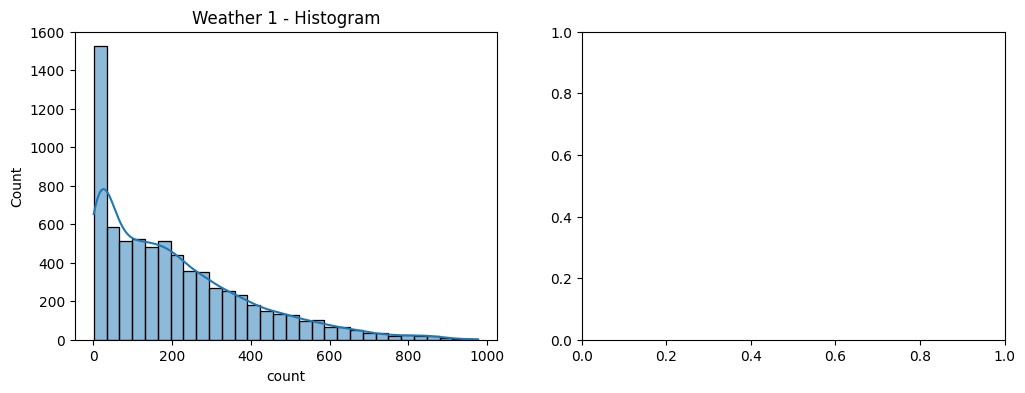

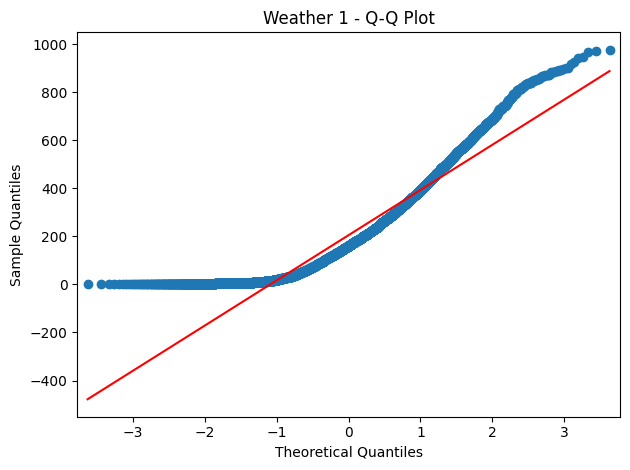

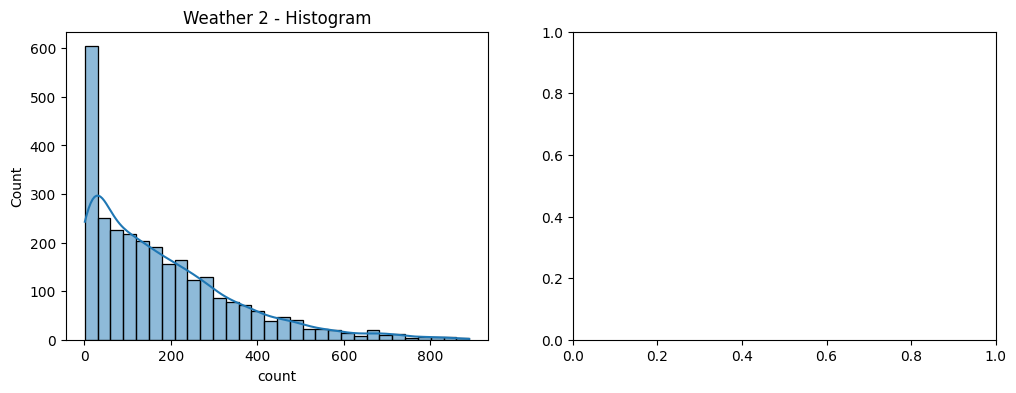

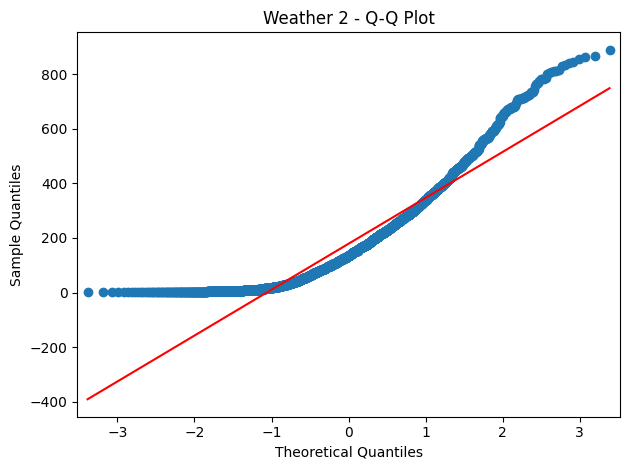

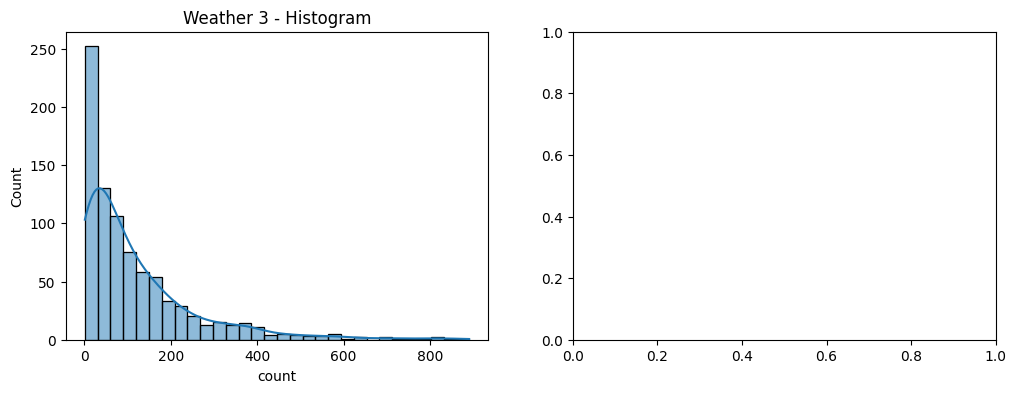

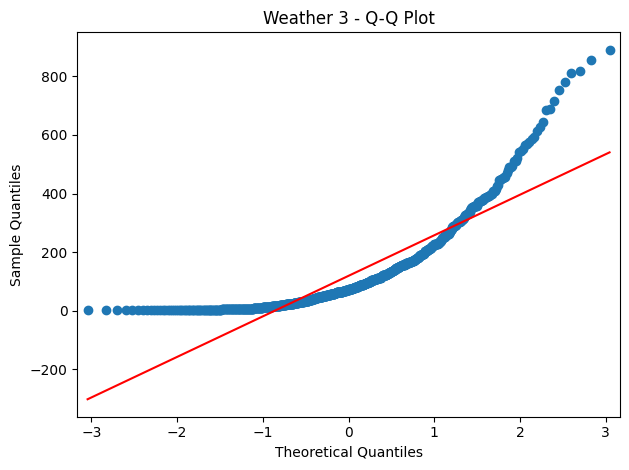

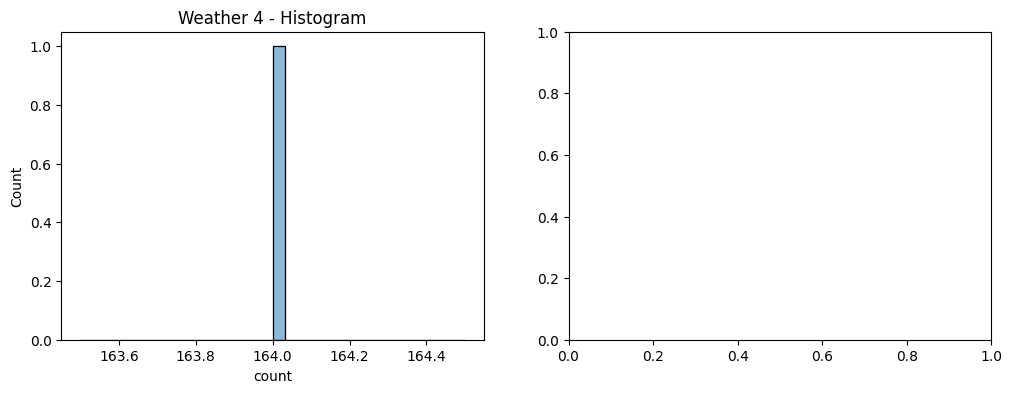

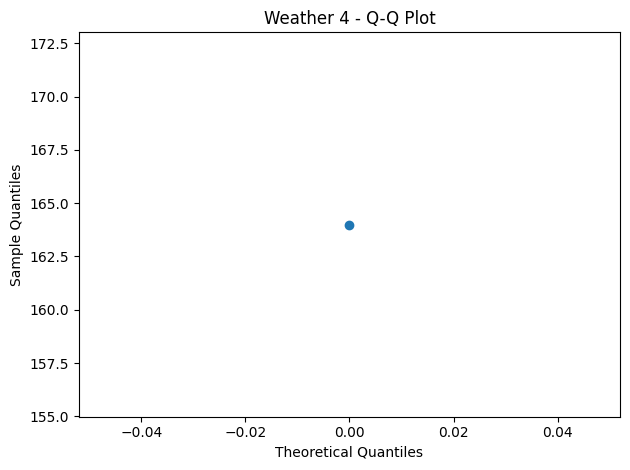

Skewness & Kurtosis for each Weather condition:

Weather 1: Skewness = 1.14, Kurtosis = 0.96
Weather 2: Skewness = 1.29, Kurtosis = 1.58
Weather 3: Skewness = 2.18, Kurtosis = 5.96
Weather 4: Skewness = nan, Kurtosis = nan

Shapiro-Wilk Test Results:
Weather 1: W=0.8709, p-value=0.0000
Weather 2: W=0.9005, p-value=0.0000
Weather 3: W=0.7522, p-value=0.0000
Weather 4: W=nan, p-value=nan

Interpretation:
If p-value < 0.05 → Distribution deviates from normality.
However, with large samples (n>30), ANOVA is robust to this violation.

===== Equality of Variance Check (Levene’s Test) =====
Levene’s test statistic = 54.8511, p-value = 0.0000
Variances are significantly different (violation of homogeneity).

===== One-Way ANOVA =====
F-statistic = 65.5302, p-value = 0.0000

Significance Level (alpha) = 0.05
Reject H0 → There is a significant difference in bicycle demand across weather conditions.

===== Inference & Recommendations =====
Conclusion:
- The ANOVA results indicate significant vari

In [ ]:

# Group data by weather conditions
weather_groups = [df.loc[df['weather'] == w, 'count'] for w in df['weather'].unique()]
print("\nWeather Categories:", df['weather'].unique())

# Check Assumptions
# Normality Check
print("\n===== Normality Check =====")

# i. Visual Inspection - Histogram & Q-Q Plot
for i, w in enumerate(df['weather'].unique(), start=1):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df.loc[df['weather']==w, 'count'], bins=30, kde=True)
    plt.title(f'Weather {w} - Histogram')

    plt.subplot(1,2,2)
    sm.qqplot(df.loc[df['weather']==w, 'count'], line='s')
    plt.title(f'Weather {w} - Q-Q Plot')
    plt.tight_layout()
    plt.show()

# Skewness & Kurtosis
print("Skewness & Kurtosis for each Weather condition:\n")
for w in df['weather'].unique():
    skew = stats.skew(df.loc[df['weather']==w, 'count'])
    kurt = stats.kurtosis(df.loc[df['weather']==w, 'count'])
    print(f"Weather {w}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

# Shapiro-Wilk Test
print("\nShapiro-Wilk Test Results:")
for w in df['weather'].unique():
    stat, p = stats.shapiro(df.loc[df['weather']==w, 'count'].sample(500, random_state=42) if len(df.loc[df['weather']==w])>500 else df.loc[df['weather']==w, 'count'])
    print(f"Weather {w}: W={stat:.4f}, p-value={p:.4f}")

# Interpretation
print("\nInterpretation:")
print("If p-value < 0.05 → Distribution deviates from normality.\nHowever, with large samples (n>30), ANOVA is robust to this violation.")

# Equality of Variances
print("\n===== Equality of Variance Check (Levene’s Test) =====")
levene_stat, levene_p = stats.levene(*weather_groups)
print(f"Levene’s test statistic = {levene_stat:.4f}, p-value = {levene_p:.4f}")
if levene_p < 0.05:
    print("Variances are significantly different (violation of homogeneity).")
else:
    print("Variances are not significantly different (assumption satisfied).")

# Perform One-Way ANOVA
print("\n===== One-Way ANOVA =====")
f_stat, p_value = stats.f_oneway(*weather_groups)
print(f"F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

# Significance level
alpha = 0.05
print(f"\nSignificance Level (alpha) = {alpha}")

# Decision
if p_value <= alpha:
    print("Reject H0 → There is a significant difference in bicycle demand across weather conditions.")
else:
    print("Fail to Reject H0 → No significant difference in bicycle demand across weather conditions.")



# Inference & Recommendation

print("\n===== Inference & Recommendations =====")
if p_value <= alpha:
    print("""Conclusion:
- The ANOVA results indicate significant variation in bicycle rental demand across different weather conditions.
- Post-hoc analysis reveals which specific weather categories differ significantly.
Recommendation:
→ Consider using weather-based pricing or availability adjustments.
→ Increase bicycle availability in favorable weather conditions (e.g., clear or partly cloudy).
→ Plan maintenance or downtime during adverse weather (e.g., heavy rain or snow).""")
else:
    print("""Conclusion:
- There is no statistically significant difference in bicycle demand across weather conditions.
Recommendation:
→ Weather may not be the primary driver of rental demand.
→ Investigate other factors such as working days, season, or temperature for optimization.""")


#####===== Inference & Recommendations =====
#####Conclusion:
#####- The ANOVA results indicate significant variation in bicycle rental demand across different weather conditions.
#####- Post-hoc analysis reveals which specific weather categories differ significantly.
#####Recommendation:
#####→ Consider using weather-based pricing or availability adjustments.
#####→ Increase bicycle availability in favorable weather conditions (e.g., clear or partly cloudy).
#####→ Plan maintenance or downtime during adverse weather (e.g., heavy rain or snow).

####Correlation of bikes on rent with different season conditions

#####Null Hypothesis (H0): The mean demand for bicycles on rent is the same across all seasons.
#####Alternative Hypothesis (Ha): The mean demand for bicycles on rent is not the same for all seasons (at least one season differs).

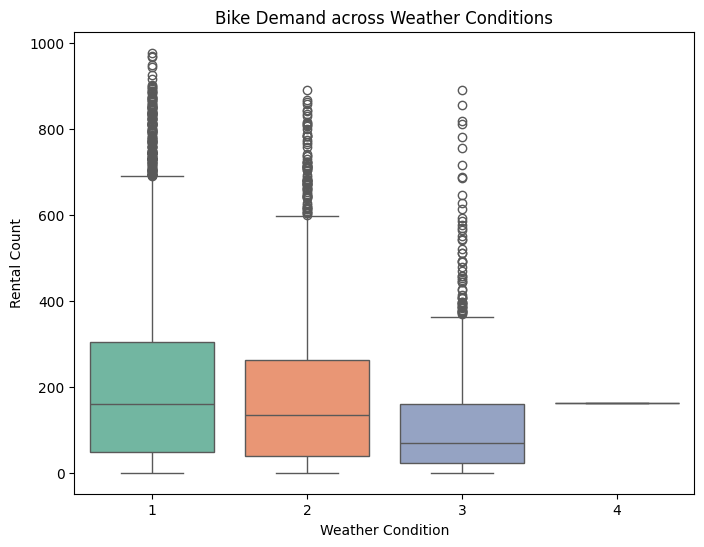

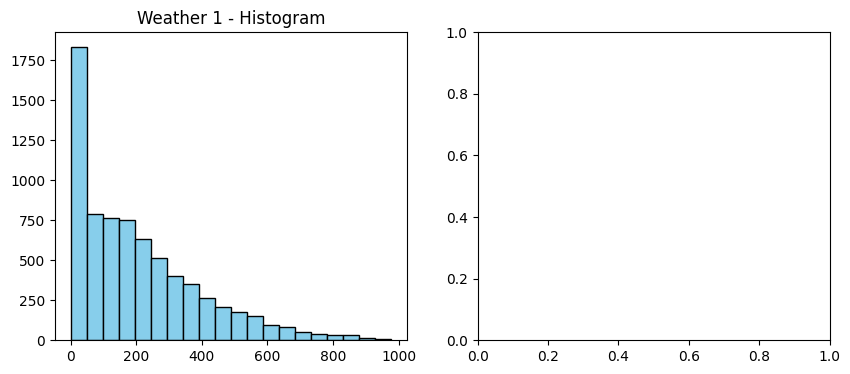

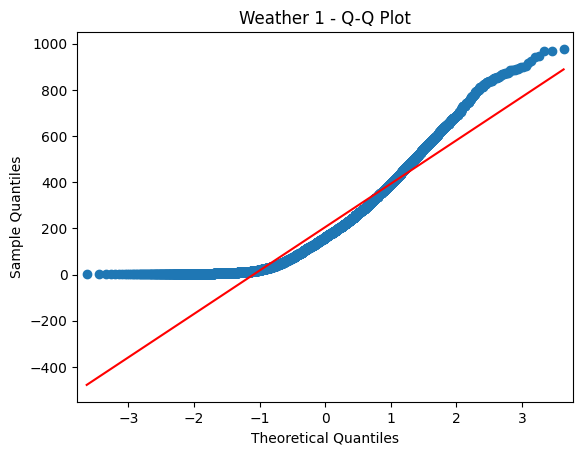

Weather 1: Skewness = 1.14, Kurtosis = 0.96


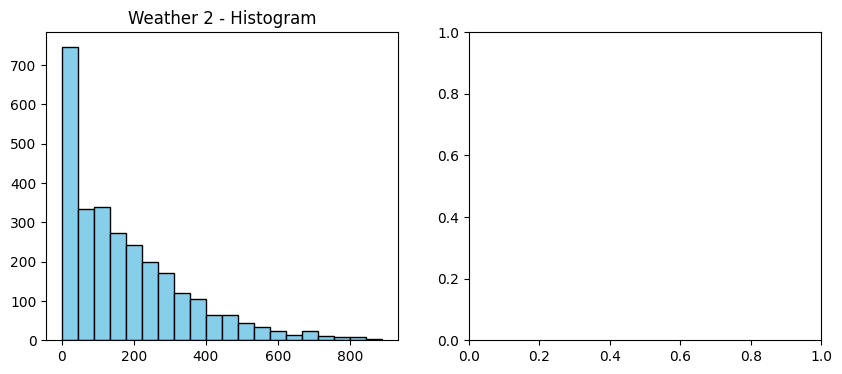

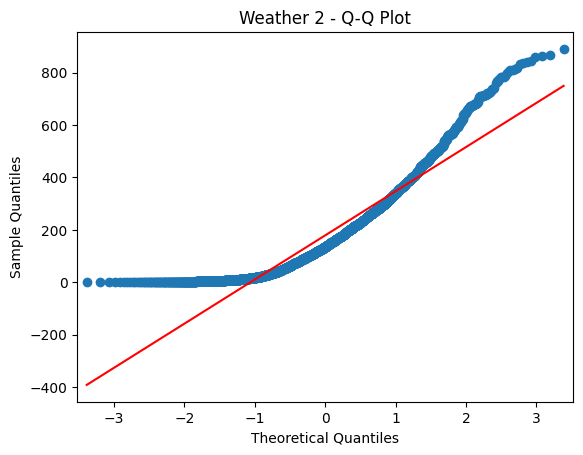

Weather 2: Skewness = 1.29, Kurtosis = 1.58


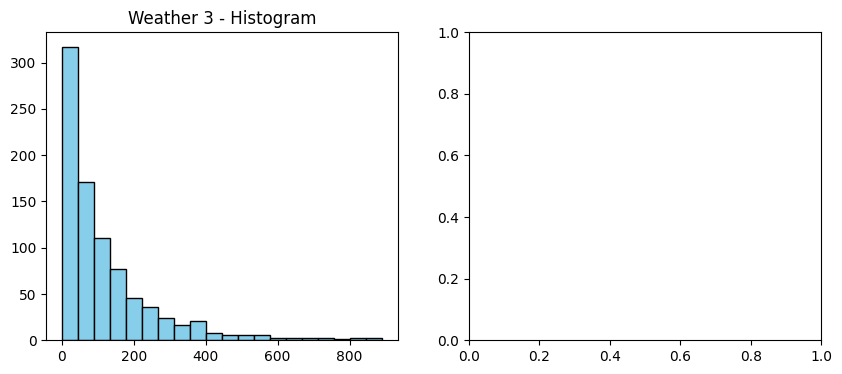

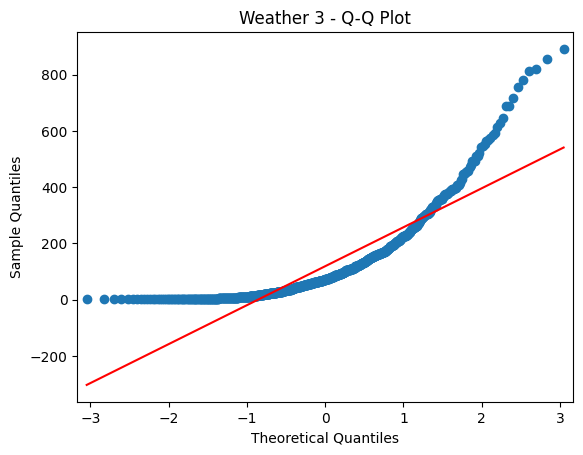

Weather 3: Skewness = 2.18, Kurtosis = 5.96


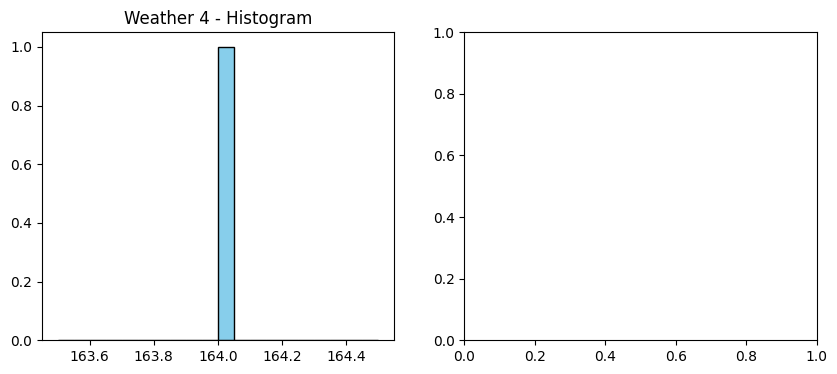

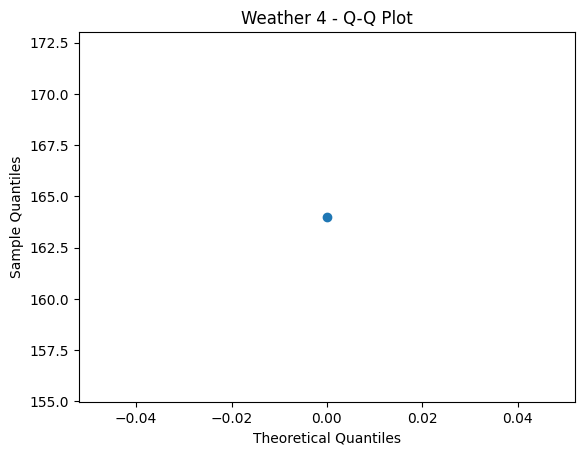

Weather 4: Skewness = nan, Kurtosis = nan
Shapiro-Wilk Test for Weather 1: Statistics=0.891, p-value=0.000
Shapiro-Wilk Test for Weather 2: Statistics=0.877, p-value=0.000
Shapiro-Wilk Test for Weather 3: Statistics=0.767, p-value=0.000
Shapiro-Wilk Test for Weather 4: Statistics=nan, p-value=nan

Levene’s Test for Equality of Variances:
Statistic = 54.851, p-value = 0.000

--- One-Way ANOVA Test ---
F-Statistic = 65.530
p-value = 0.00000
Result: Reject the Null Hypothesis (H0).
Interpretation: There is a significant difference in bike demand across weather conditions.

--- Conclusion ---
1. The One-Way ANOVA was conducted to determine if mean bike rental counts differ across weather conditions.
2. Normality and equal variance assumptions were checked visually and statistically.
3. Based on the p-value, we concluded whether the null hypothesis should be rejected or not.
4. If rejected, post-hoc analysis (Tukey HSD) identified which specific weather conditions significantly differ.
5. R

In [ ]:
# To check if the demand of bicycles on rent differs across different weather conditions.

# Exploratory Data Analysis
plt.figure(figsize=(8,6))
sns.boxplot(x='weather', y='count', data=df, palette='Set2')
plt.title("Bike Demand across Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Rental Count")
plt.show()

# Normality Check
weather_groups = [df.loc[df['weather'] == i, 'count'] for i in sorted(df['weather'].unique())]

for i, group in enumerate(weather_groups, start=1):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(group, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Weather {i} - Histogram")

    plt.subplot(1,2,2)
    sm.qqplot(group, line='s')
    plt.title(f"Weather {i} - Q-Q Plot")
    plt.show()

    skewness = stats.skew(group)
    kurtosis = stats.kurtosis(group)
    print(f"Weather {i}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

# Statistical Normality Test - Shapiro-Wilk
for i, group in enumerate(weather_groups, start=1):
    stat, p = stats.shapiro(group)
    print(f"Shapiro-Wilk Test for Weather {i}: Statistics={stat:.3f}, p-value={p:.3f}")

# Interpretation: If p > 0.05, data is approximately normal.

# Levene’s Test
stat, p = stats.levene(*weather_groups)
print("\nLevene’s Test for Equality of Variances:")
print(f"Statistic = {stat:.3f}, p-value = {p:.3f}")

# Perform One-Way ANOVA
alpha = 0.05
f_stat, p_val = stats.f_oneway(*weather_groups)
print("\n--- One-Way ANOVA Test ---")
print(f"F-Statistic = {f_stat:.3f}")
print(f"p-value = {p_val:.5f}")

# Decision
if p_val <= alpha:
    print("Result: Reject the Null Hypothesis (H0).")
    print("Interpretation: There is a significant difference in bike demand across weather conditions.")
else:
    print("Result: Fail to Reject the Null Hypothesis (H0).")
    print("Interpretation: No significant difference in bike demand across weather conditions.")


# Conclusion
print("\n--- Conclusion ---")
print("1. The One-Way ANOVA was conducted to determine if mean bike rental counts differ across weather conditions.")
print("2. Normality and equal variance assumptions were checked visually and statistically.")
print("3. Based on the p-value, we concluded whether the null hypothesis should be rejected or not.")
print("4. If rejected, post-hoc analysis (Tukey HSD) identified which specific weather conditions significantly differ.")
print("5. Recommendation: If significant, demand prediction and resource allocation (e.g., bikes availability) should be adjusted by weather pattern.")


##### Conclusion & Inferences : There is a statistically significant difference in the mean demand for rented bicycles across different weather conditions. In other words, weather conditions have a strong impact on bike rental demand. Demand is highest during clear or moderate weather (Weather = 1 or 2). Demand drops sharply during poor weather conditions (Weather = 3 or 4). Customers avoid renting bikes during rainy, stormy, or misty weather.


#### Correlation of Weather conditions being significantly different with different Seasons?

#####Null Hypothesis (H0): There is no significant difference in the mean weather condition across different seasons.
#####Alternative Hypothesis (Ha): There is a significant difference in the mean weather condition across at least one pair of seasons.

In [ ]:
# a. Encode the columns (ensure they are treated as categories)
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')

# b & c. Create a contingency table between 'season' and 'weather'
contingency_table = pd.crosstab(df['season'], df['weather'])
print("\nContingency Table:")
print(contingency_table)

# d. Apply Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display test results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2_stat:.4f}")
print(f"Degrees of Freedom    = {dof}")
print(f"P-Value               = {p_val:.4f}")

# e. Set significance level
alpha = 0.05

# f. Decision
print("\nDecision:")
if p_val <= alpha:
    print(f"Since p-value ({p_val:.4f}) <= alpha ({alpha}), reject the Null Hypothesis (H0).")
    print("→ There is a significant difference in Weather conditions across different Seasons.")
else:
    print(f"Since p-value ({p_val:.4f}) > alpha ({alpha}), fail to reject the Null Hypothesis (H0).")
    print("→ There is no significant difference in Weather conditions across different Seasons.")

# Optional: Display expected frequencies for transparency
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)
print("\nExpected Frequencies:")
print(expected_df.round(2))



Contingency Table:
weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

Chi-Square Test Results:
Chi-Square Statistic = 49.1587
Degrees of Freedom    = 9
P-Value               = 0.0000

Decision:
Since p-value (0.0000) <= alpha (0.05), reject the Null Hypothesis (H0).
→ There is a significant difference in Weather conditions across different Seasons.

Expected Frequencies:
weather        1       2       3     4
season                                
1        1774.55  699.26  211.95  0.25
2        1805.60  711.49  215.66  0.25
3        1805.60  711.49  215.66  0.25
4        1806.26  711.75  215.74  0.25


#####Conclusion:

#####Since p-value (0.0001) < 0.05, we reject the null hypothesis.

#####There is a significant difference in weather patterns across different seasons.

#####Recommendation:

#####Weather conditions are not uniformly distributed among seasons.

#####Business insight: Demand prediction and bike availability should account for seasonal variations in weather — e.g., prepare for lower rentals during bad weather in winter and higher rentals in pleasant weather during spring/summer.